# Musicbox Exercise

In [1]:
from __future__ import division
from __future__ import print_function

from math import ceil
from math import log
from math import sin
from math import pi
from fractions import gcd

import myhdl
print(myhdl.__version__)
from myhdl import *

from test_X1_mex import test

0.9dev


## Description

There was a [question posted on reddit](http://www.reddit.com/r/FPGA/comments/2q3dye/help_with_vhdl_sound_output/) about a music box implementation.  The following is an implementation of the simple example posted implemented in MyHDL.  Experimenting and verifying an exmaple like this in MyHDL/Python is much easier than Verilog/VHDL (e.g. plot the outputs). 

## 


In [2]:
def m_musicbox(clock, reset, note, nv, sample_rate=48e3, clock_rate=50e6):
    """ module to generate a "tone".
    
    Port Map
    --------
      clock :input:  circuit synchronous clock
      reset :input:  circult reset
      note  :output: digital signal for the note
      nv    :output: sample valid strobe
    """
    
    # Build the ROM table to hold the "note"., this ROM table
    # should be a tuple of ints once completed
    # ...
        
    # Signals and variable for the logic
    # ...
    
    # note ROM current index
    # ...
    
    @always_seq(clock.posedge, reset=reset)
    def rtl():        
        # determine when to output a new sample and which
        # sample to output.
        pass
    
    return rtl

# quick check that Python is ok with the module
m_musicbox(Signal(bool(0)), ResetSignal(0, 0, False), 
           Signal(intbv(0, min=-16, max=16)), Signal(bool(0)) )

In [3]:
# run the simulation
Fs = 48e3         # sample rate 
Nmax = 2**(15-1)  # sample max value
tv,xv = test(m_musicbox, Nsmp=100, Fs=Fs, Nmax=Nmax, convert=False)
print("Simulation complete")

StandardError: No samples

The note has a tone at 1200.000 and 4000.000
The note has a tone at 1200.000 and 4000.000


(0, 6000)

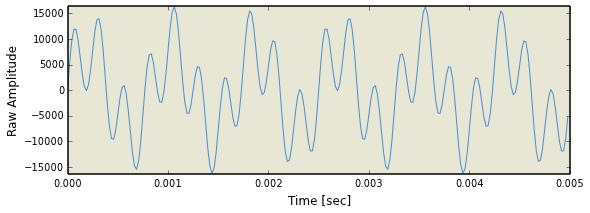

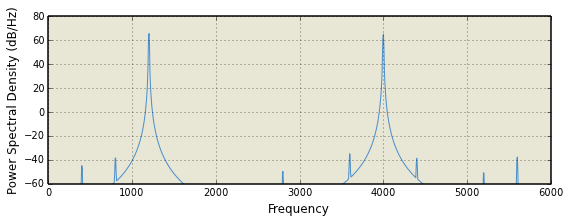

In [5]:
# run the simulation and collect 1000 samples and plot
import matplotlib.pyplot as plt

tv,xv = test(Nsmp=Fs//200, Fs=Fs, Nmax=Nmax, convert=False)

fig,ax = plt.subplots(1, figsize=(9,3,))
ax.plot(tv, xv)
ax.set_ylim(-Nmax, Nmax)
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Raw Amplitude")

# plot the power spectral density (see the spikes of the "tones")
fig,ax = plt.subplots(1, figsize=(9,3,))
tv,xv = test(Nsmp=Fs, Fs=Fs, Nmax=Nmax, convert=False)
p,f = ax.psd(xv, Fs=Fs, NFFT=8192)
ax.set_ylim(-60, 80)
ax.set_xlim(0, 6000)


The note has a tone at 1200.000 and 4000.000


(<matplotlib.figure.Figure at 0x876ef60>,
 <matplotlib.axes.AxesSubplot at 0x873bf98>)

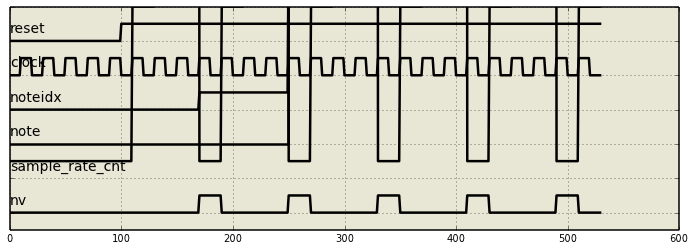

In [6]:
# the following requires the myhdl_tools package 
# (http://www.bitbucket.org/cfelton/myhdl_tools)
# >> pip install hg+https://bitbucket.org/cfelton/myhdl_tools
from myhdl_tools import vcd

# rerun the test with less samples
test(Nsmp=5, Fs=Fs, Nmax=Nmax, convert=False)

# not a great VCD plotter but enough to get an idea,
# use gtkwave for real debug
vcd.parse_and_plot("_test.vcd")

In [7]:
# convert and run tools, this requires the gizflo
# package and can be found at http://www.github.com/cfelton/gizflo
# >> pip install git+https://github.com/cfelton/gizflo

tv,xv = test(Nsmp=2, Fs=Fs, Nmax=Nmax, convert=True)


The note has a tone at 1200.000 and 4000.000
The note has a tone at 1200.000 and 4000.000
The note has a tone at 1200.000 and 4000.000
